In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a = 1
Rw = 0.04
m = 1.8
n = 2
c1 = 0.45
c2 = 250
c3 = 2.1
c4 = 2
c5 = 19.5
c6 = 1.7
Sw_1 = 1
Sw_50 = 0.5
Sw_25 = 0.25
CPS_20k = 20000
CPS_2k = 2000
CPS_200 = 200
CPS_20 = 20

In [3]:
data = {'Porosity': [0.01, 1]}
df = pd.DataFrame (data)
df.head()

,Porosity
0,0.01
1,1.00


In [4]:
def Rt (a, Rw, m, n, Sw, Porosity):
    Rt = a * Rw * Porosity**(-m) * Sw**(-n)
    return Rt

In [5]:
df['Rt_at_Sw_1'] = Rt (a, Rw, m, n, Sw_1, df['Porosity'])
df['Rt_at_Sw_50'] = Rt (a, Rw, m, n, Sw_50, df['Porosity'])
df['Rt_at_Sw_25'] = Rt (a, Rw, m, n, Sw_25, df['Porosity'])
df.head()

,Porosity,Rt_at_Sw_1,Rt_at_Sw_50,Rt_at_Sw_25
0,0.01,159.242868,636.971473,2547.885892
1,1.00,0.040000,0.160000,0.640000


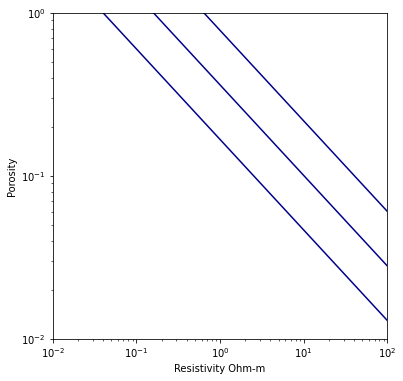

In [24]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(df['Rt_at_Sw_1'], df['Porosity'], color='darkblue', linestyle = '-')
ax.plot(df['Rt_at_Sw_50'], df['Porosity'], color='darkblue', linestyle = '-')
ax.plot(df['Rt_at_Sw_25'], df['Porosity'], color='darkblue', linestyle = '-')
ax.set_ylabel('Porosity')
ax.set_xlabel('Resistivity Ohm-m')
ax.grid()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0.01,100)
ax.set_ylim(0.01,1)
ax.grid()

In [7]:
data2 = {'ZONE': [1, 2, 3, 4, 5, 'A'],
        'Rt': [4, 3.1, 2.2, 1, 3.5, 10],
        'PHI': [0.176, 0.21, 0.17, 0.16, 0.08,0.046]}
df2 = pd.DataFrame (data2)
df2.tail()

,ZONE,Rt,PHI
1,2,3.1,0.210
2,3,2.2,0.170
3,4,1.0,0.160
4,5,3.5,0.080
5,A,10.0,0.046


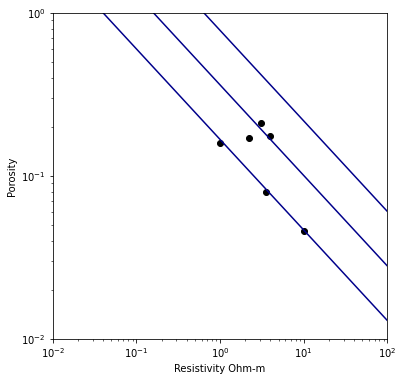

In [8]:
#Question 3
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(df['Rt_at_Sw_1'], df['Porosity'], color='darkblue', linestyle = '-')
ax.plot(df['Rt_at_Sw_50'], df['Porosity'], color='darkblue', linestyle = '-')
ax.plot(df['Rt_at_Sw_25'], df['Porosity'], color='darkblue', linestyle = '-')
ax.scatter(df2['Rt'], df2['PHI'], color='black', linestyle = '-')
ax.set_ylabel('Porosity')
ax.set_xlabel('Resistivity Ohm-m')
ax.grid()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0.01,100)
ax.set_ylim(0.01,1)
ax.grid()

In [9]:
#Question 1 Value of m is the slope of line Rt at 100%Sw = (logy2-logy1)/(logx2-logx1)
slope = m;
m

1.8

In [10]:
#Question 2
a*Rw

0.04

In [11]:
#Question 4
data3 = {'Porosity': [0.01, 1]}
df3 = pd.DataFrame (data3)
df3.head()

,Porosity
0,0.01
1,1.00


In [12]:
def Rt_process_speed (a, Rw, m, n, CPS, c2, c3, c4, Porosity):
    Rt_process_speed = a * Rw * Porosity**(-(m+c3*n-n/c4))*c2**(-n)*CPS**(n/c4)
    return Rt_process_speed

In [13]:
df3['Rt_at_CPS_20000'] = Rt_process_speed (a, Rw, m, n, CPS_20k, c2, c3, c4, df3['Porosity'])
df3['Rt_at_CPS_2000'] = Rt_process_speed (a, Rw, m, n, CPS_2k, c2, c3, c4, df3['Porosity'])
df3['Rt_at_CPS_200'] = Rt_process_speed (a, Rw, m, n, CPS_200, c2, c3, c4, df3['Porosity'])
df3['Rt_at_CPS_20'] = Rt_process_speed (a, Rw, m, n, CPS_20, c2, c3, c4, df3['Porosity'])
df3.head()

,Porosity,Rt_at_CPS_20000,Rt_at_CPS_2000,Rt_at_CPS_200,Rt_at_CPS_20
0,0.01,1.280000e+08,1.280000e+07,1.280000e+06,128000.000000
1,1.00,1.280000e-02,1.280000e-03,1.280000e-04,0.000013


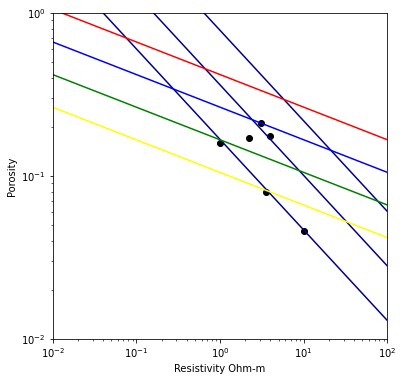

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(df['Rt_at_Sw_1'], df['Porosity'], color='darkblue', linestyle = '-')
ax.plot(df['Rt_at_Sw_50'], df['Porosity'], color='darkblue', linestyle = '-')
ax.plot(df['Rt_at_Sw_25'], df['Porosity'], color='darkblue', linestyle = '-')
ax.scatter(df2['Rt'], df2['PHI'], color='black', linestyle = '-')
ax.plot(df3['Rt_at_CPS_20000'], df3['Porosity'], color='red', linestyle = '-')
ax.plot(df3['Rt_at_CPS_2000'], df3['Porosity'], color='blue', linestyle = '-')
ax.plot(df3['Rt_at_CPS_200'], df3['Porosity'], color='green', linestyle = '-')
ax.plot(df3['Rt_at_CPS_20'], df3['Porosity'], color='yellow', linestyle = '-')
ax.set_ylabel('Porosity')
ax.set_xlabel('Resistivity Ohm-m')
ax.grid()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0.01,100)
ax.set_ylim(0.01,1)
ax.grid()

In [15]:
#Question5
def A (c5, Sw, c6):
    A = c5 * Sw ** (-c6)
    return A

In [17]:
def Pc (A, CPS, c1):
    Pc = A * (CPS/100) ** (-c1)
    return Pc

In [18]:
data4 = {'Sw': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
df4 = pd.DataFrame (data4)
df4.head()

,Sw
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


In [19]:
df4['A'] = A (c5, df4['Sw'], c6)
df4.head()

,Sw,A
0,0.0,inf
1,0.1,977.315106
2,0.2,300.804008
3,0.3,150.983149
4,0.4,92.583294


In [20]:
df4['Pc_2000'] = Pc (df4['A'], CPS_2k, c1)
df4['Pc_200'] = Pc (df4['A'], CPS_200, c1)
df4['Pc_20'] = Pc (df4['A'], CPS_20, c1)
df4.head()

,Sw,A,Pc_2000,Pc_200,Pc_20
0,0.0,inf,inf,inf,inf
1,0.1,977.315106,253.846461,715.436533,2016.374114
2,0.2,300.804008,78.130413,220.201423,620.611931
3,0.3,150.983149,39.216152,110.526134,311.504970
4,0.4,92.583294,24.047455,67.774938,191.015728


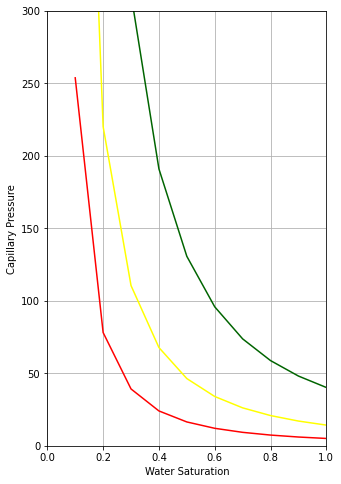

In [23]:
fig, ax = plt.subplots(figsize=(5,8))
ax.plot(df4['Sw'], df4['Pc_2000'], color='red', linestyle = '-')
ax.plot(df4['Sw'], df4['Pc_200'], color='yellow', linestyle = '-')
ax.plot(df4['Sw'], df4['Pc_20'], color='darkgreen', linestyle = '-')
ax.set_ylabel('Capillary Pressure')
ax.set_xlabel('Water Saturation')
ax.set_xlim(0,1)
ax.set_ylim(0,300)
ax.grid()